# us-accident-analysis

Use the "Run" button to execute the code.

# Importing needed modules/libraries

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from folium.plugins import HeatMap

# US Accident Exploratory Data Analysis

-> talk about EDA

-> talk about dataset
     

*   kaggle
*   accidents information
*   used for prevention of accidents
*   Contains data of 49 states(excluding New york)
*   List item






In [3]:
pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vedu929
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:07<00:00, 35.3MB/s]


In [12]:
data_file='/content/us-accidents/US_Accidents_Dec21_updated.csv'

##Data Preparation and Cleaning

-> Load file using pandas

-> Get knowledge of basic information of dataset

->Search and Fix Missing and Incorrect values 

->Duplicate values also be searched





In [13]:
df=pd.read_csv(data_file)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [15]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [16]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

Percentage of Missing values per column

In [17]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage[missing_percentage !=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

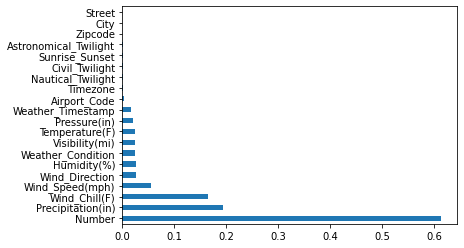

In [18]:
missing_percentage[missing_percentage !=0].plot(kind='barh')

Remove columns that are not well to be used

##Exploratory Analysis and Visualization

=>Columns to be analyzed

  *   city
  *   Temperature
  *   Start lat Start lng
  *   Visibility
  *   







### CITY

In [19]:
cities=df.City.unique()
cities[:100]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Cleveland', 'Lima', 'Westerville', 'Jamestown', 'Freeport',
       'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell', 'Edinburgh',
       'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', 'Anderson', 

In [20]:
cities_by_accident=df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

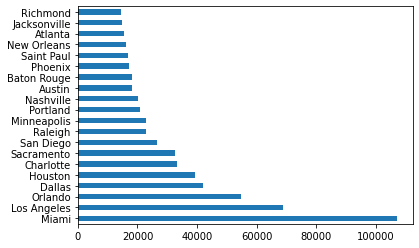

In [21]:
cities_by_accident[:20].plot(kind='barh')

In [22]:
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [25]:
sns.set_style("darkgrid")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


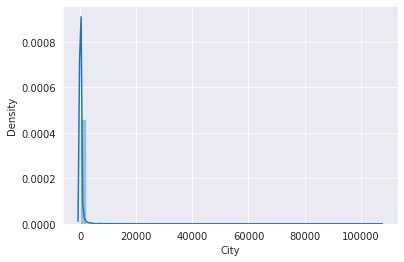

In [24]:
sns.distplot(cities_by_accident)

In [27]:
high_accident_cities= cities_by_accident[cities_by_accident >= 1000]
low_accident_cities= cities_by_accident[cities_by_accident <800]

In [28]:
len(high_accident_cities)/len(cities)

0.04245848313644924

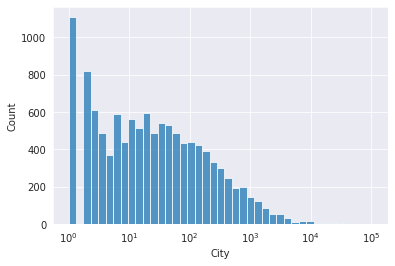

In [29]:
sns.histplot(cities_by_accident,log_scale=True)

### START TIME

In [30]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [31]:
#start_time is object(mixrure of more data types) therefore we convert it into date time
df.Start_Time=pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


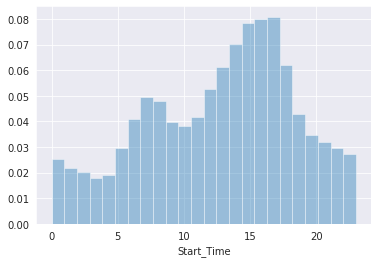

In [32]:
#get hour from timestamp and plot
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

-- There are high number of accidents betwwen 2pm and 6pm

-- Next highest percentage of accidents occur between 6am and 9 am

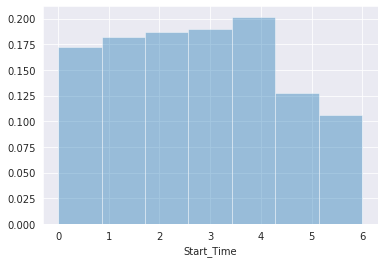

In [33]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

Is the distribution by hour same on weekends as on weekdays

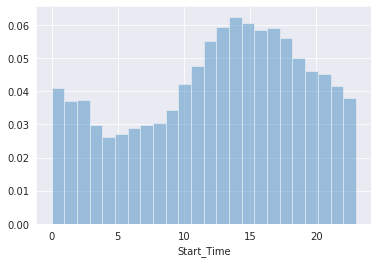

In [34]:
weekend_start_time=df.Start_Time[df.Start_Time.dt.dayofweek>4]
sns.distplot(weekend_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

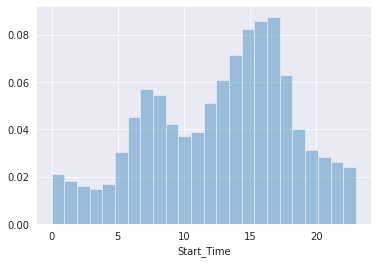

In [35]:
weekday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek<4]
sns.distplot(weekday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

-- Important thing to note is there are more accidents on start of day (say 00 am to 5 am) and on end of day(say 10pm to 00) on WEEKEND rather on WEEKDAYS!!!!!

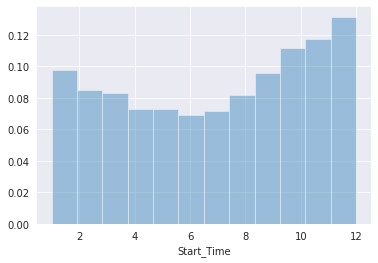

In [36]:
df_2020=df[df.Start_Time.dt.year==2018]
sns.distplot(df_2020.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

-- By analyzing per month acident of every year it is known thate there is missing data in year of 2016,2019 but we get an efficience trend in 2018 graph

Source Of The Data is unavailable

##Start Latitude & Longitude

In [37]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [38]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

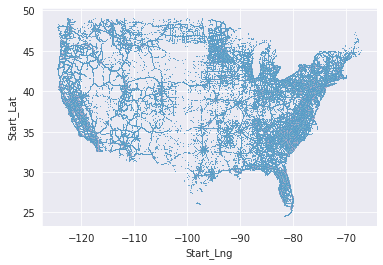

In [39]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,s=1)

In [40]:
import folium

In [41]:
zip(list(df.Start_Lat),list(df.Start_Lng))


In [42]:
sample_df=df.sample(int(0.01*len(df)))
lat_lon_pairs=list(zip(list(sample_df.Start_Lat),list(df.Start_Lng)))


In [43]:

map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

##Visibility

In [59]:
visibility_accidents=df['Visibility(mi)'].value_counts()
visibility_accidents

10.0    2230276
7.0       79649
9.0       68817
8.0       55955
5.0       53933
         ...   
6.2           1
63.0          1
43.0          1
36.0          1
19.0          1
Name: Visibility(mi), Length: 76, dtype: int64

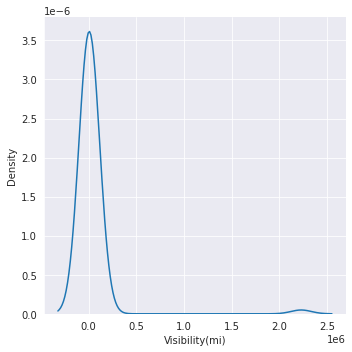

In [61]:
sns.displot(visibility_accidents, kind="kde")

-- We know that smaller the value of visibility it is hard to see,there fore by the dataset we are provided we can conclude that most of the accidents have occured in low visibility in the range of less than 0.5

###Severity

In [65]:
df['Severity'].value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

In [72]:
most_severe_accidents=df.Severity[df.Severity==4]
most_severe_accidents

count    131193.0
mean          4.0
std           0.0
min           4.0
25%           4.0
50%           4.0
75%           4.0
max           4.0
Name: Severity, dtype: float64

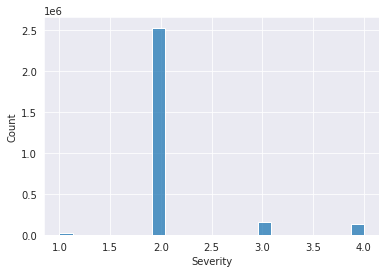

In [75]:
sns.histplot(df.Severity)

--As we can see most of the accidents have severity of 2

##Ask and Answer Question

1. State's with higher number of accidents?
per capita

2. Role of Visibility and Wind speed in  accidents 

3. Where does New York show(largest by population) in the data?

4. Which states have cities with most accidents?

5. What time in a day have more accidents?


## Summary and Conclusion

Insights:
---
* No data from New York
*  Only around 4% cities have more than 1000 accidents
*   Over 1000 cities have reported just one accident(need to be inspected)
*   No of accident per city decreases exponentially













##Future scope